# Import Library

In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Read Data

In [2]:
# Generate data paths with labels
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Data Koju'

# Show class label
labels = os.listdir(data_dir)
print("Daftar Label Kelas:")
for label in labels:
    print(label)

Mounted at /content/drive
Daftar Label Kelas:
Sooty Mould
Powdery Mildew
Bacterial Canker
Die Back
Cutting Weevil
Anthracnose
Healthy
Gall Midge


In [3]:
import pandas as pd

# Inisialisasi list untuk data gambar dan label
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
df.head()

,filepaths,labels
0,/content/drive/MyDrive/Data Koju/Sooty Mould/I...,Sooty Mould
1,/content/drive/MyDrive/Data Koju/Sooty Mould/I...,Sooty Mould
2,/content/drive/MyDrive/Data Koju/Sooty Mould/I...,Sooty Mould
3,/content/drive/MyDrive/Data Koju/Sooty Mould/I...,Sooty Mould
4,/content/drive/MyDrive/Data Koju/Sooty Mould/I...,Sooty Mould


In [ ]:
format_image = set()

for image in df['filepaths'].values:
    format = cv2.imread(image)
    format_image.add(format.shape)

print(format_image)

{(320, 189, 3), (240, 302, 3), (162, 320, 3), (175, 320, 3), (290, 240, 3), (239, 320, 3), (240, 249, 3), (221, 320, 3), (240, 288, 3), (265, 240, 3), (173, 320, 3), (240, 266, 3), (320, 219, 3), (240, 292, 3), (219, 320, 3), (273, 240, 3), (205, 320, 3), (232, 320, 3), (245, 240, 3), (70, 320, 3), (240, 305, 3), (317, 240, 3), (218, 320, 3), (212, 320, 3), (320, 226, 3), (320, 237, 3), (213, 320, 3), (86, 320, 3), (240, 262, 3), (240, 284, 3), (297, 240, 3), (211, 320, 3), (195, 320, 3), (224, 320, 3), (240, 314, 3), (262, 240, 3), (285, 240, 3), (308, 240, 3), (92, 320, 3), (226, 320, 3), (193, 320, 3), (320, 229, 3), (179, 320, 3), (240, 307, 3), (222, 320, 3), (320, 218, 3), (217, 320, 3), (166, 320, 3), (306, 240, 3), (240, 320, 3), (240, 304, 3), (237, 320, 3), (240, 282, 3), (240, 297, 3), (223, 320, 3), (271, 240, 3), (230, 320, 3), (240, 244, 3), (320, 210, 3), (320, 213, 3), (272, 240, 3), (320, 214, 3), (320, 240, 3), (160, 320, 3), (320, 238, 3), (320, 187, 3), (206, 320, 3

{(320, 189, 3), (240, 302, 3), (162, 320, 3), (175, 320, 3), (290, 240, 3), (239, 320, 3), (240, 249, 3), (221, 320, 3), (240, 288, 3), (265, 240, 3), (173, 320, 3), (240, 266, 3), (320, 219, 3), (240, 292, 3), (219, 320, 3), (273, 240, 3), (205, 320, 3), (232, 320, 3), (245, 240, 3), (70, 320, 3), (240, 305, 3), (317, 240, 3), (218, 320, 3), (212, 320, 3), (320, 226, 3), (320, 237, 3), (213, 320, 3), (86, 320, 3), (240, 262, 3), (240, 284, 3), (297, 240, 3), (211, 320, 3), (195, 320, 3), (224, 320, 3), (240, 314, 3), (262, 240, 3), (285, 240, 3), (308, 240, 3), (92, 320, 3), (226, 320, 3), (193, 320, 3), (320, 229, 3), (179, 320, 3), (240, 307, 3), (222, 320, 3), (320, 218, 3), (217, 320, 3), (166, 320, 3), (306, 240, 3), (240, 320, 3), (240, 304, 3), (237, 320, 3), (240, 282, 3), (240, 297, 3), (223, 320, 3), (271, 240, 3), (230, 320, 3), (240, 244, 3), (320, 210, 3), (320, 213, 3), (272, 240, 3), (320, 214, 3), (320, 240, 3), (160, 320, 3), (320, 238, 3), (320, 187, 3), (206, 320, 3), (200, 320, 3), (229, 320, 3), (240, 313, 3), (240, 300, 3), (214, 320, 3), (227, 320, 3), (320, 217, 3), (240, 240, 3), (209, 320, 3), (199, 320, 3), (263, 240, 3), (171, 320, 3), (299, 240, 3), (283, 240, 3), (320, 234, 3), (207, 320, 3), (197, 320, 3), (220, 320, 3), (210, 320, 3), (182, 320, 3), (246, 240, 3), (240, 309, 3), (238, 320, 3), (228, 320, 3), (282, 240, 3), (320, 224, 3)}

## Split data

In [4]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.6, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

print('train_df:', train_df.shape[0])
print('valid_df:', valid_df.shape[0])
print('test_df:', test_df.shape[0])

train_df: 2400
valid_df: 800
test_df: 800


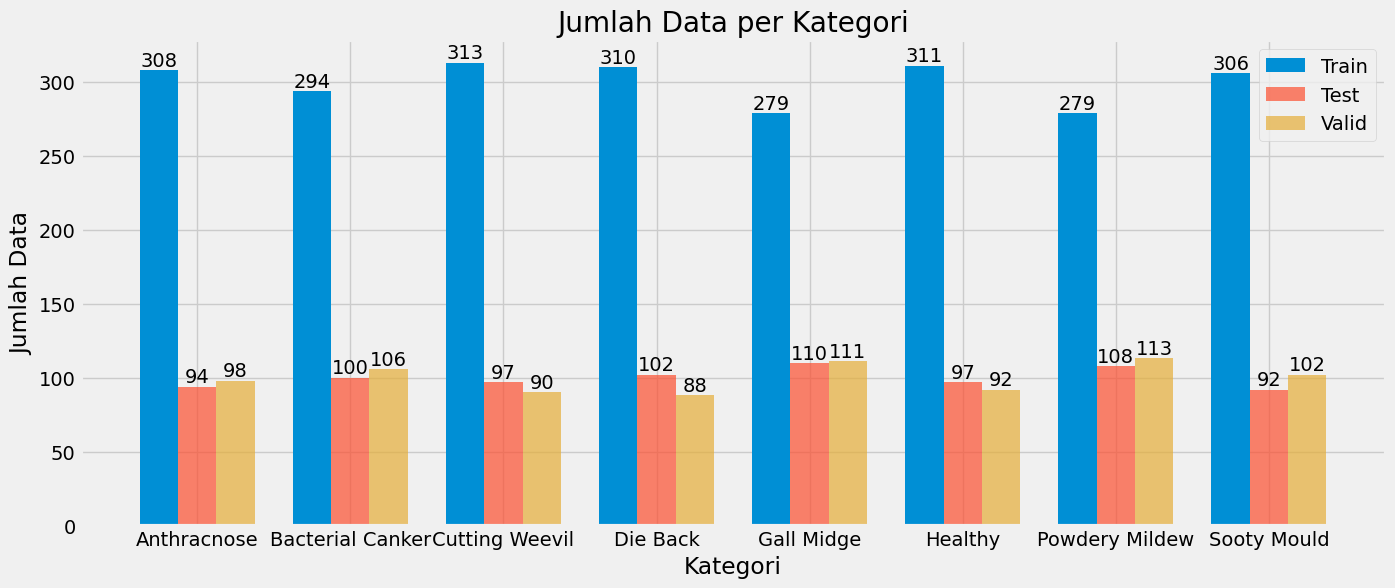

In [ ]:
# Data yang ingin divisualisasikan
train_counts = train_df['labels'].value_counts().sort_index()
test_counts = test_df['labels'].value_counts().sort_index()
valid_counts = valid_df['labels'].value_counts().sort_index()

# Menyusun label untuk sumbu x (kategorinya)
labels = train_counts.index

# Menyusun data untuk setiap kategori (jumlah data)
train_data = train_counts.values
test_data = test_counts.values
valid_data = valid_counts.values

# Koordinat untuk setiap bar
index = range(len(labels))

# Lebar bar pada grafik
bar_width = 0.25

# Membuat visualisasi dengan grafik batang
plt.figure(figsize=(15, 6))
plt.bar(index, train_data, bar_width, label='Train')
plt.bar([i + bar_width for i in index], test_data, bar_width, label='Test', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], valid_data, bar_width, label='Valid', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kategori')
plt.xticks([i + bar_width for i in index], labels)
plt.legend()

# Menambahkan label jumlah data pada setiap bar
for i, v in enumerate(train_data):
    plt.text(i, v, str(v), ha='center', va='bottom')
for i, v in enumerate(test_data):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(valid_data):
    plt.text(i + 2 * bar_width, v, str(v), ha='center', va='bottom')

# Menampilkan grafik
plt.show()

### Image Data Generator

In [5]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar, rescale=1./255)
ts_gen = ImageDataGenerator(preprocessing_function= scalar, rescale=1./255)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 2400 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.


# Model Structure

### Pre-Trained

In [6]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    classifier_activation='softmax'
)
base_model.trainable=False

model = Sequential([
    base_model,
    Conv2D(32, (3, 3), activation='relu',
    input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(rate=0.3),
    Dense(8, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[Recall(), Precision(), 'accuracy']
)

model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          147488    
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                         

## Train Model

In [17]:
model_callback = EarlyStopping(
    monitor='loss',
    verbose=1,
    mode='min',
    patience=3
)

history = model.fit(
    x= train_gen,
    epochs= 75,
    validation_data= valid_gen,
    shuffle= False,
    verbose=1
)

Epoch 1/75
150/150 [==============================] - 19s 128ms/step - loss: 0.0084 - recall: 0.9967 - precision: 0.9971 - accuracy: 0.9971 - val_loss: 0.2018 - val_recall: 0.9475 - val_precision: 0.9487 - val_accuracy: 0.9475
Epoch 2/75
150/150 [==============================] - 18s 121ms/step - loss: 0.0111 - recall: 0.9946 - precision: 0.9950 - accuracy: 0.9950 - val_loss: 0.6420 - val_recall: 0.8775 - val_precision: 0.8830 - val_accuracy: 0.8800
Epoch 3/75
150/150 [==============================] - 17s 116ms/step - loss: 0.0118 - recall: 0.9958 - precision: 0.9967 - accuracy: 0.9962 - val_loss: 0.3254 - val_recall: 0.9262 - val_precision: 0.9321 - val_accuracy: 0.9262
Epoch 4/75
150/150 [==============================] - 17s 115ms/step - loss: 0.0078 - recall: 0.9975 - precision: 0.9979 - accuracy: 0.9979 - val_loss: 0.2216 - val_recall: 0.9425 - val_precision: 0.9496 - val_accuracy: 0.9438
Epoch 5/75
150/150 [==============================] - 18s 122ms/step - loss: 0.0209 - recall

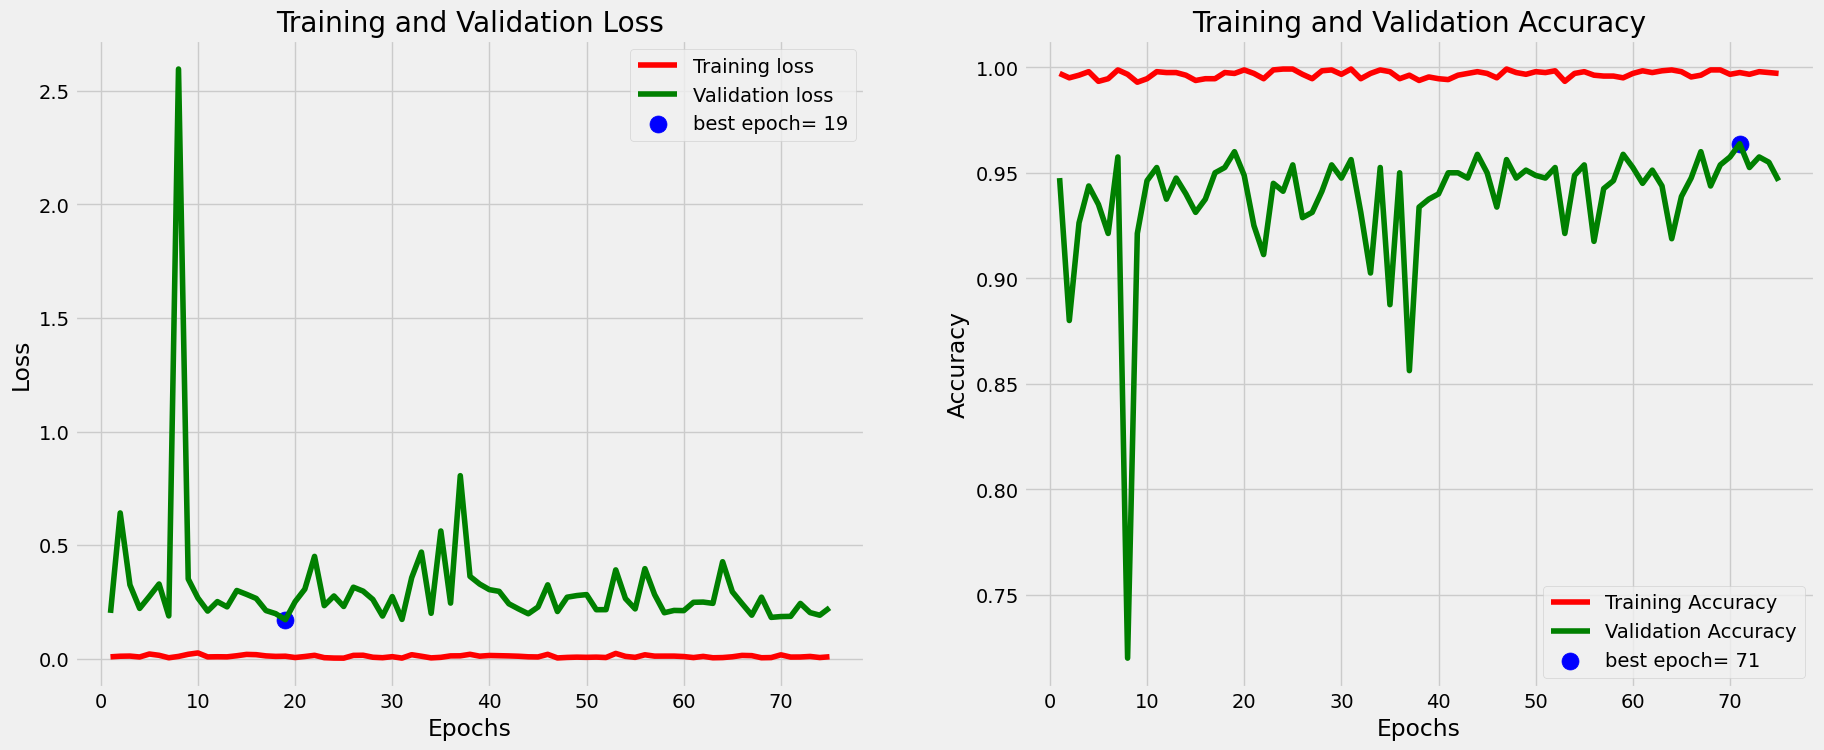

In [18]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## Model Evaluation

In [19]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

10/10 [==============================] - 5s 435ms/step - loss: 0.2482 - recall: 0.9525 - precision: 0.9525 - accuracy: 0.9525
Train Loss:  0.0025266415905207396
Train Accuracy:  1.0
--------------------
Validation Loss:  0.44193920493125916
Validation Accuracy:  0.9125000238418579
--------------------
Test Loss:  0.24822069704532623
Test Accuracy:  0.9524999856948853


## Get Predict

In [20]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<ipython-input-20-01135dd8c8ed>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


### Confusion Matrics and Classification Report

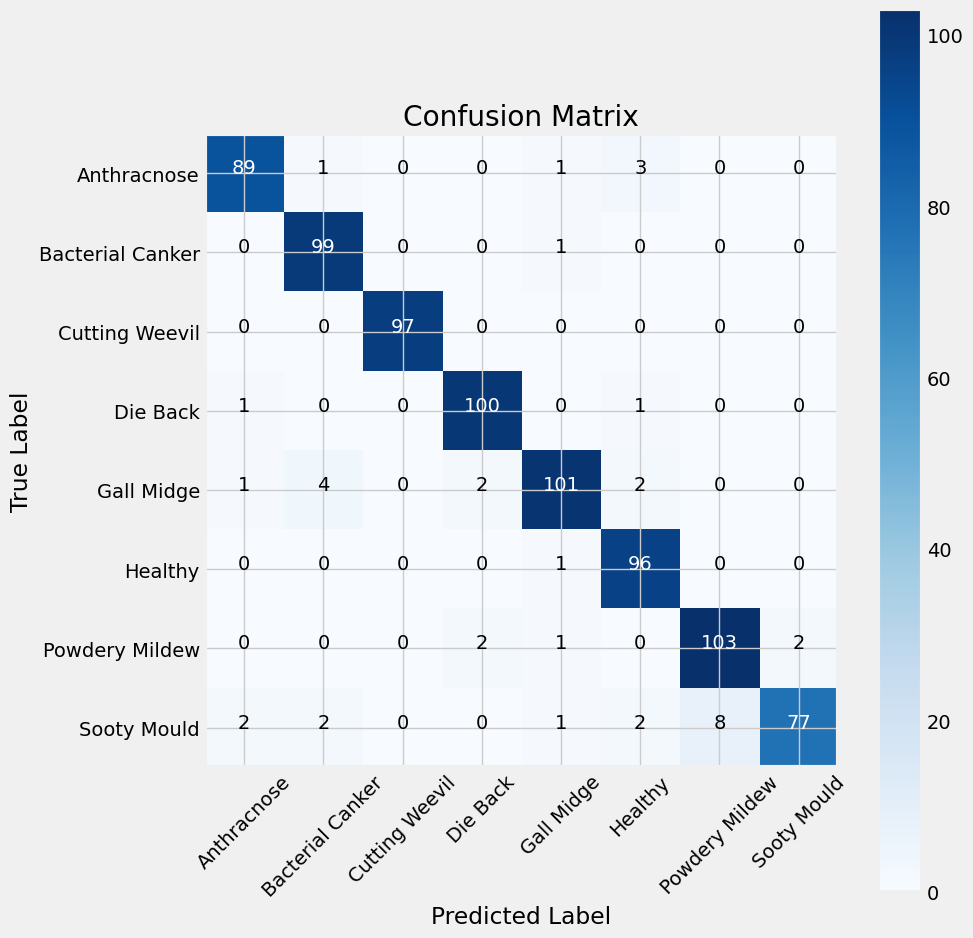

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [22]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

     Anthracnose       0.96      0.95      0.95        94
Bacterial Canker       0.93      0.99      0.96       100
  Cutting Weevil       1.00      1.00      1.00        97
        Die Back       0.96      0.98      0.97       102
      Gall Midge       0.95      0.92      0.94       110
         Healthy       0.92      0.99      0.96        97
  Powdery Mildew       0.93      0.95      0.94       108
     Sooty Mould       0.97      0.84      0.90        92

        accuracy                           0.95       800
       macro avg       0.95      0.95      0.95       800
    weighted avg       0.95      0.95      0.95       800



### Save Model

In [23]:
model_name = model.input_names[0][:-6]
subject = 'Mango Diseases'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model was saved as vgg19-Mango Diseases-95.25.h5
weights were saved as vgg19-Mango Diseases-weights.h5


In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as Mango Diseases-class_dict.csv
